# Dataset Description

# Data Dictionary

Survival -> 0 = No, 1 = Yes
pclass (Ticket class) ->	1 = 1st, 2 = 2nd, 3 = 3rd
sex	-> Male, Female	
sibsp	// of siblings / spouses aboard the Titanic	
parch	// of parents / children aboard the Titanic	
ticket    // Ticket number	
fare	   // Passenger fare	
cabin	Cabin number	
embarked	(Port of Embarkation) ->	C = Cherbourg, Q = Queenstown, S = Southampton

#  Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

# From: https://www.kaggle.com/competitions/titanic/data

# Import Libraries

In [109]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Load the data

In [110]:
raw_data = pd.read_csv('./train.csv')
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Exploration

### Explore the descriptive statistics of the attributes

In [111]:
raw_data.describe(include='all')
# The categorical variables don't have some types of numerical descriptives and numerical variables 
# don't have some types of categorical descriptives so the value displayed is NaN.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


#### From the descriptive statistics I observed that:
##### >> there are missing values for the attributes Age, Cabin and Embarked
##### >> there are no duplicate tuples, as there 891 unique names for 891 observations

In [112]:
# with this line I can confirm that there are no duplicate tuples
raw_data.duplicated().any()

False

In [113]:
# I'll also drop the attributes Name and PassengerId, because I believe that in this case the name has no use as a predictor
raw_data = raw_data.drop(['Name','PassengerId'], axis=1)
# With the feature selection technique 'f_regression' I used in one of the slides I have seen that the 
# attribute PassengerId has a very high p-value which means that the attribute is not a good predictor

In [114]:
raw_data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [115]:
# From the data types of the attributes we can se that except the ticket number which seems to be an object
# instead of number as it was described in the dataset description, all other attributes data type is correct
raw_data['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [116]:
# From the data above, we can see that some ticket numbers have preffixes, which may reffer 
# to specific agencies

# I'll extract the number and the string preffix, if it exist, from each ticket value and save them
# into new attributes called ticket_agency (for the preffix) and ticket_number for the number itself...

# raw_data['Ticket'] = raw_data['Ticket'].apply()
# raw_data['Ticket']

In [117]:
# Although the Ticket attribute I may lose some explanatory power if I drop the column refering to this
# attribute, I'll still drop it for this model in specific because I believe that it's o no use
raw_data = raw_data.drop(['Ticket'], axis=1)

### Dealing with the missing values

In [118]:
raw_data.isnull().sum() # To get the total number of missing values for each attribute

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [119]:
# Get the percentage of missing values for each attribute with missing values
raw_data_mv = raw_data.isnull().sum()/len(raw_data)*100 
raw_data_mv = raw_data_mv.drop(raw_data_mv[raw_data_mv == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :raw_data_mv})
missing_data

,Missing Ratio
Cabin,77.104377
Age,19.865320
Embarked,0.224467


#### Plot the missing values

Text(0.5, 1.0, 'Attributes wiht Missing Values')

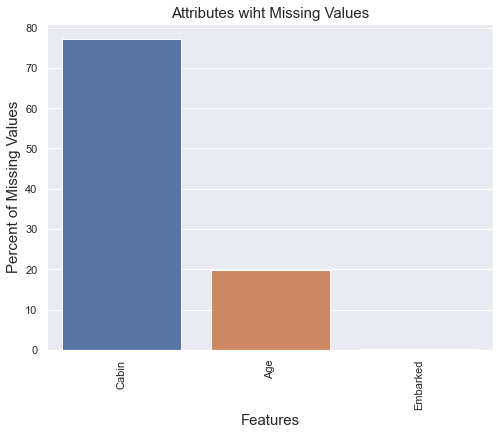

In [120]:
fig, ax = plt.subplots(figsize=(8,6))
plt.xticks(rotation='90')
sns.barplot(x=raw_data_mv.index, y=raw_data_mv)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of Missing Values', fontsize=15)
plt.title('Attributes wiht Missing Values', fontsize=15)

In [121]:
# For the embarked attribute, I'll simply drop the missing values as there a less than 5% observations
# with missing values
raw_data = raw_data[raw_data['Embarked'].notna()]
raw_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [122]:
# For the attributes Age and Cabin, dropping the rows with missing values would cost a lot of data as 
# the rows with missing values for these are more than 5% of the observations. So the missing values 
# must be dealt in another way

# For the attribute Cabin, althought I think that it's very significant, to avoid errors due to wrong
# treatment to fill the missing values I'll drop the attribute... Also the attribute Pclass will
# help to cover a good amount of explanatory power lost due to the loss of the cabin attribute. 
# when I try to improve the model, I'll deal with the attribute cabin with a better method

raw_data = raw_data.drop(['Cabin'], axis=1)
raw_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [123]:
# For the age attribute, I observed that there are althougt there are a lot of missing values, they don't 
# exceed 60% and the values are numerical, so I decided to fill the missing values

# I'll fill the missing values with the mean instead of the median since, from my observation of the 
# descriptive statistics, there are no obvious outliers.

raw_data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64

In [124]:
raw_data['Age'] = raw_data['Age'].replace(np.NaN, raw_data['Age'].mean())
raw_data['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.642093
889    26.000000
890    32.000000
Name: Age, Length: 889, dtype: float64

In [125]:
raw_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [126]:
# I'll create another variable for the data with no missing values 
data_no_mv = raw_data.copy()
data_no_mv.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889,889.000000,889.000000,889.000000,889.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.382452,2.311586,NaN,29.642093,0.524184,0.382452,32.096681,NaN
std,0.486260,0.834700,NaN,12.968346,1.103705,0.806761,49.697504,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.895800,NaN
50%,0.000000,3.000000,NaN,29.642093,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,31.000000,NaN


### Creating Dummies for categorical values

In [127]:
data_no_mv['Sex'].unique()

array(['male', 'female'], dtype=object)

In [128]:
data_with_dummies = data_no_mv.copy()
data_with_dummies['Sex'] = data_with_dummies['Sex'].map({'male':1, 'female':0})
data_with_dummies['Sex'].unique()

array([1, 0], dtype=int64)

In [129]:
data_with_dummies['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [130]:
data_with_dummies['Embarked'] = data_with_dummies['Embarked'].map({'S':0, 'C':1, 'Q':2})
data_with_dummies['Embarked'].unique()

array([0, 1, 2], dtype=int64)

### PDF plot
#### To see if the data is normaly distributed and whether there are any obvious outliers

C:\Users\Munguambe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

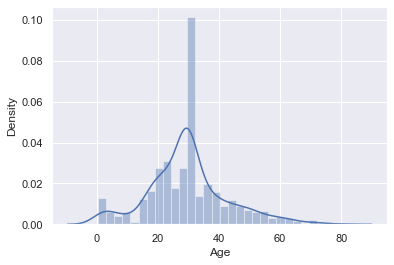

In [131]:
# Plot the Age attribute to see if there are any observable anomaly in the distribution
sns.distplot(data_with_dummies['Age'])

#### For better analyses, I'll verify the skewness of all variables, and apply a log transformation for those that are above the treshold, that is, above 0.75

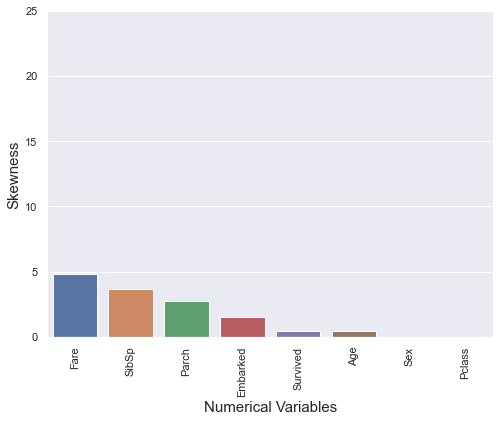

In [132]:
numerical_attributes = data_with_dummies.dtypes[data_with_dummies.dtypes != "object"].index
# in this case, since I have already created the dummies, all attributes are numerical

skewed_attributes = data_with_dummies[numerical_attributes].skew()
skewness = pd.DataFrame({"Variable":skewed_attributes.index, "Skewness":skewed_attributes.values})
skewness = skewness.sort_values('Skewness', ascending=[0])

fig, ax = plt.subplots(figsize=(8,6))
plt.xticks(rotation='90')
sns.barplot(x=skewness['Variable'], y=skewness['Skewness'])
plt.ylim(0,25)
plt.xlabel('Numerical Variables', fontsize=15)
plt.ylabel('Skewness', fontsize=15)
plt.title('', fontsize=15)
plt.show() # display the skewness of the attributes without the log transformation

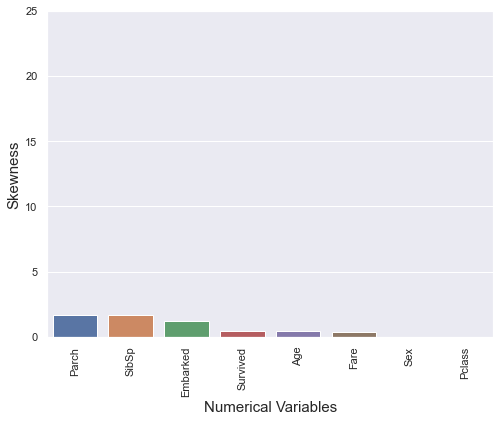

In [133]:
# Select the attributes with the skewness above the treshold, .75
skewed_attributes = skewed_attributes[skewed_attributes > 0.75]
data_with_dummies[skewed_attributes.index] = np.log1p(data_with_dummies[skewed_attributes.index])

skewed_attributes = data_with_dummies[numerical_attributes].skew()
skewness_new = pd.DataFrame({"Variable":skewed_attributes.index, "Skewness":skewed_attributes.values})
# select the variables with a skewness above a certain threshold

skewness_new = skewness_new.sort_values('Skewness', ascending=[0])

fig, ax = plt.subplots(figsize=(8,6))
plt.xticks(rotation='90')
sns.barplot(x=skewness_new['Variable'], y=skewness_new['Skewness'])
plt.ylim(0,25)
plt.xlabel('Numerical Variables', fontsize=15)
plt.ylabel('Skewness', fontsize=15)
plt.title('', fontsize=15)
plt.show() # display the plot of the skewness of the attributes after the log transformation

In [134]:
# get the summary to see if all data is numerical
data_with_dummies.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,29.642093,0.282473,0.218171,2.959024,0.226144
std,0.486260,0.834700,0.477538,12.968346,0.463165,0.412014,0.967750,0.379940
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,2.185579,0.000000
50%,0.000000,3.000000,1.000000,29.642093,0.000000,0.000000,2.737881,0.000000
75%,1.000000,3.000000,1.000000,35.000000,0.693147,0.000000,3.465736,0.693147
max,1.000000,3.000000,1.000000,80.000000,2.197225,1.945910,6.240917,1.098612


In [135]:
# Store the data in the variable data_cleaned
data_cleaned = data_with_dummies.copy()
data_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,0.693147,0.0,2.110213,0.000000
1,1,1,0,38.0,0.693147,0.0,4.280593,0.693147
2,1,3,0,26.0,0.000000,0.0,2.188856,0.000000
3,1,1,0,35.0,0.693147,0.0,3.990834,0.000000
4,0,3,1,35.0,0.000000,0.0,2.202765,0.000000


In [136]:
data_cleaned.to_csv('./train_cleaned.csv')

### Correlation analysis

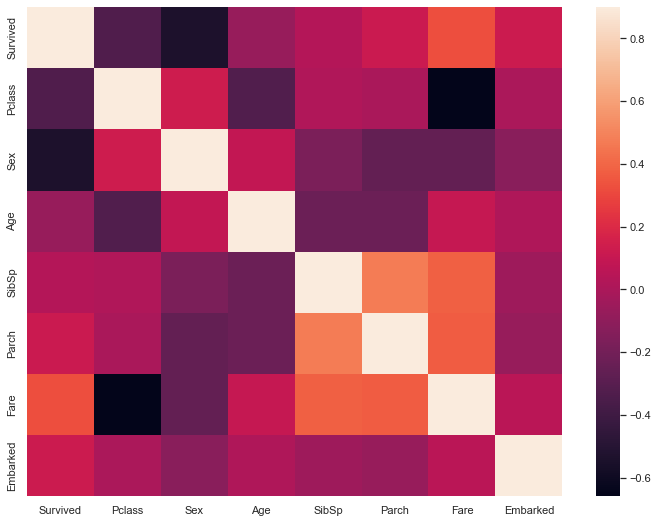

In [137]:
corrmat = data_cleaned.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9);

#### From the heatmap, ,we can see that some of the attributes are highly correlated, such as Fare and Pclass or Survived and Sex. From my observations, wether a passenger survived or not has a lot to do with their sex and their pclass (proxy for socio-economic status). 

C:\Users\Munguambe\anaconda3\lib\site-packages\seaborn\matrix.py:1214: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


<Figure size 576x432 with 0 Axes>

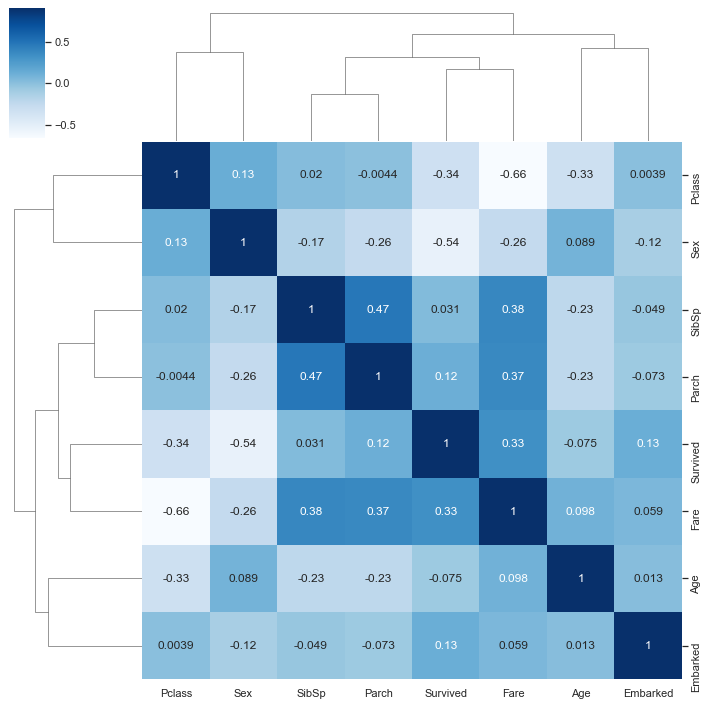

In [138]:
plt.figure(figsize=(8,6))
sns.clustermap(corrmat, vmax=0.9, square=True, annot=True, cmap="Blues");

#### with the clustermap, it can be seen that the correlation between the attribute survived and the attributes age and pclass is inverse, which means that the lower the age and the pclass, the higher the chance of survivel. The same is true for sex, the lower the dummie value I used the higher the value of the survived attribute, that is to say that females have higher chance of having survived than males.

# Declare the targets and inputs

In [139]:
targets = data_cleaned['Survived']
targets.shape

(889,)

In [140]:
inputs = data_cleaned.drop(['Survived'], axis=1)
inputs.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

# The Dataset ready for split

In [141]:
print("Number of examples: ", inputs.shape[0])
print("Number of variables:", inputs.shape[0])
print("Variable names:     ", inputs.columns)
print("Target values:      ", targets.unique())
print("Class Distribution  ", [(x,sum(targets==x)) for x in np.unique(targets)])

Number of examples:  889
Number of variables: 889
Variable names:      Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')
Target values:       [0 1]
Class Distribution   [(0, 549), (1, 340)]


# Plot each input against the target

Text(0.5, 1.0, 'Survived and Embarked')

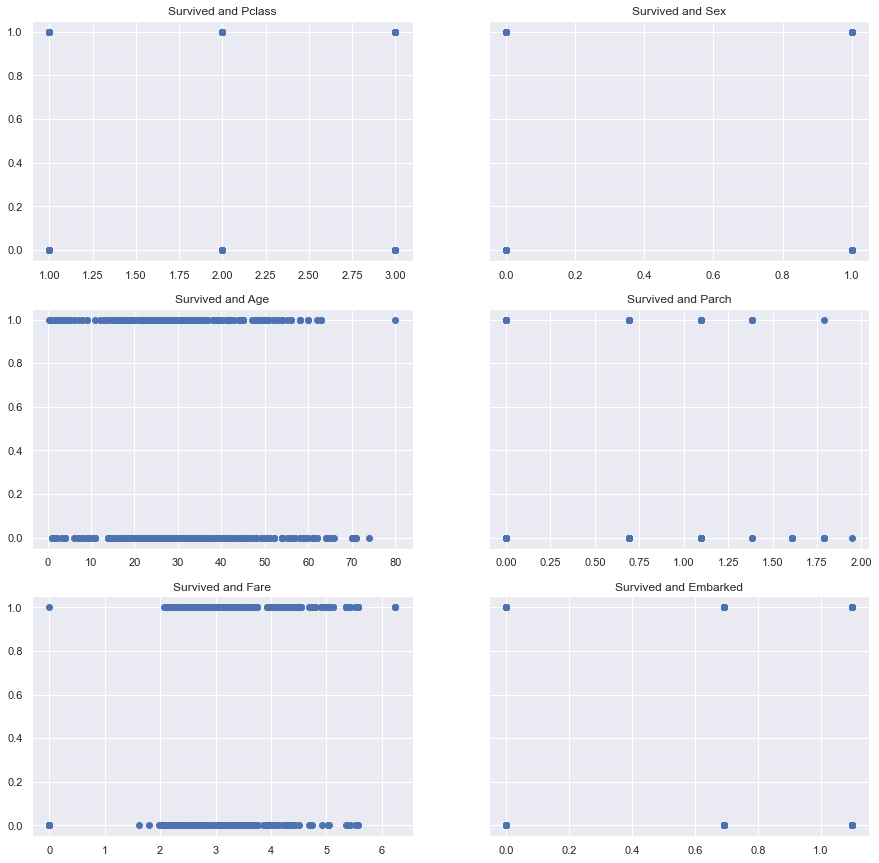

In [142]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3,ncols=2, sharey=True, figsize =(15,15)) # share survived as y
ax1.scatter(data_cleaned['Pclass'],data_cleaned['Survived'])
ax1.set_title('Survived and Pclass')
ax2.scatter(data_cleaned['Sex'],data_cleaned['Survived'])
ax2.set_title('Survived and Sex')
ax3.scatter(data_cleaned['Age'],data_cleaned['Survived'])
ax3.set_title('Survived and Age')
ax4.scatter(data_cleaned['Parch'],data_cleaned['Survived'])
ax4.set_title('Survived and Parch')
ax5.scatter(data_cleaned['Fare'],data_cleaned['Survived'])
ax5.set_title('Survived and Fare')
ax6.scatter(data_cleaned['Embarked'],data_cleaned['Survived'])
ax6.set_title('Survived and Embarked')

### Normalize the inputs

In [143]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)
inputs_scaled

array([[ 8.25208629e-01,  7.35342031e-01, -5.89619855e-01, ...,
        -5.29822060e-01, -8.77590935e-01, -5.95544194e-01],
       [-1.57221121e+00, -1.35991138e+00,  6.44847987e-01, ...,
        -5.29822060e-01,  1.36637963e+00,  1.22984173e+00],
       [ 8.25208629e-01, -1.35991138e+00, -2.81002895e-01, ...,
        -5.29822060e-01, -7.96281271e-01, -5.95544194e-01],
       ...,
       [ 8.25208629e-01, -1.35991138e+00, -5.48213849e-16, ...,
         2.13812299e+00,  2.45663007e-01, -5.95544194e-01],
       [-1.57221121e+00,  7.35342031e-01, -2.81002895e-01, ...,
        -5.29822060e-01,  4.91068011e-01,  1.22984173e+00],
       [ 8.25208629e-01,  7.35342031e-01,  1.81922546e-01, ...,
        -5.29822060e-01, -8.16755342e-01,  2.29762404e+00]])

### Split the data into train and test

In [144]:
from sklearn.model_selection import train_test_split

# I'll split 20% for test and 80% for train
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

# Build and Train the Model

In [145]:
def get_model_evaluation(true_value, prediction):
    occuracy = sum(true_value==prediction)/(sum(true_value==prediction) + sum(true_value!=prediction))*100
    precision = abs(sum(prediction==0)-sum(prediction!=true_value))/(abs(sum(prediction==0)-sum(prediction!=true_value))+abs(sum(prediction==0)-sum(prediction==true_value)))
    recall = abs(sum(prediction==0)-sum(prediction!=true_value))/(abs(sum(prediction==0)-sum(prediction!=true_value))+abs(sum(prediction==1)-sum(prediction==true_value)))
    f1_measure = 2*precision*recall/(recall+precision)

    return f'Occuracy: {occuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-measure: {f1_measure}'

In [184]:
def get_count_of_wrong_correct_predictions(targets, predictions):
#     data_with_predictions['Target'] =  targets.values
#     data_with_predictions['Prediction'] =  predictions
    return print(f"Wrong Predictions: {(targets.values!=predictions).sum()}\nCorrect Predictions: {(targets.values==predictions).sum()}")

## Logistic Regression

In [147]:
# Create the model
reg_logistic = linear_model.LogisticRegression(C=10e10, random_state=1234)

# Fit the model
reg_logistic.fit(x_train,y_train)

LogisticRegression(C=100000000000.0, random_state=1234)

In [148]:
# Predict using the model
y_hat = reg_logistic.predict(x_test)
y_hat

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0], dtype=int64)

In [149]:
y_test.shape

(178,)

# Results

In [150]:
# Get the weights
reg_logistic.coef_

array([[-0.80001399, -1.25070399, -0.47897981, -0.3456428 , -0.08126249,
         0.23633241,  0.20934563]])

In [151]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg_logistic.coef_[0]
reg_summary

,Features,Weights
0,Pclass,-0.800014
1,Sex,-1.250704
2,Age,-0.478980
3,SibSp,-0.345643
4,Parch,-0.081262
5,Fare,0.236332
6,Embarked,0.209346


In [185]:
# get the number of correct and wrong predictions
get_count_of_wrong_correct_predictions(y_test, y_hat)

Wrong Predictions: 31
Correct Predictions: 147


In [161]:
# get the evaluation of the model
print(f'Train Evaluation:\n{get_model_evaluation(y_train,reg_logistic.predict(x_train))}\n==================\nTest Evaluation:\n{get_model_evaluation(y_test,y_hat)}')

Train Evaluation:
Occuracy: 79.60618846694796
Precision: 0.7410926365795725
Recall: 0.5
F1-measure: 0.5971291866028708
Test Evaluation:
Occuracy: 82.58426966292134
Precision: 0.7672413793103449
Recall: 0.5
F1-measure: 0.6054421768707484


#### From the Evaluation of the training and testing, I can see that there is no overfit nor underfit and the occuracy is good

## Decision Tree

In [154]:
from sklearn.tree import DecisionTreeClassifier

# create the model and fit the data
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
tree = decision_tree.predict(x_test)

In [186]:
# get the number of correct and wrong predictions
get_count_of_wrong_correct_predictions(y_test, tree)

Wrong Predictions: 31
Correct Predictions: 147


In [156]:
print(f'Train Evaluation:\n{get_model_evaluation(y_train,decision_tree.predict(x_train))}\n==================\nTest Evaluation:\n{get_model_evaluation(y_test,tree)}')

Train Evaluation:
Occuracy: 98.17158931082982
Precision: 0.6364963503649635
Recall: 0.5
F1-measure: 0.5600513808606294
Test Evaluation:
Occuracy: 82.58426966292134
Precision: 0.8362068965517241
Recall: 0.5
F1-measure: 0.6258064516129032


#### From the Evaluation of the training and testing, I observed that in the decision tree, for training the occurracy was 100% despite of the precision being low, which confirms that only using the occuracy evaluation is not enough it can be seen from the precision measure which is low.
#### the testing evaluation results also show that the true ocurracy is far lower than the one calculated previosly with the training results, but the precision is far higher compared to the training results

##### I think that this is also an example of overfit, as the training occuracy was so high yet the perfomance in testing was far lower.

## KNN

In [189]:
from sklearn.neighbors import KNeighborsClassifier

num_neighbors = 10
knn = KNeighborsClassifier(n_neighbors = num_neighbors)
knn.fit(x_train, y_train)
knn_prediction = knn.predict(x_test)
# get the number of correct and wrong predictions
get_count_of_wrong_correct_predictions(y_test, knn_prediction)
print(f'\nTrain Occuracy: {knn.score(x_train, y_train)*100}\nTest Occuracy: {knn.score(x_test, y_test)*100}')

Wrong Predictions: 33
Correct Predictions: 145

Train Occuracy: 82.84106891701828
Test Occuracy: 81.46067415730337


## Random Forest

In [191]:
from sklearn.ensemble import RandomForestClassifier

num_estimators = 50
random_forest = RandomForestClassifier(n_estimators=num_estimators)
random_forest.fit(x_train,y_train)
rf_prediction = random_forest.predict(x_test)
# get the number of correct and wrong predictions
get_count_of_wrong_correct_predictions(y_test, y_hat)

print(f'\nTrain Occuracy: {random_forest.score(x_train, y_train)*100}\nTest Occuracy: {random_forest.score(x_test, y_test)*100}')

Wrong Predictions: 31
Correct Predictions: 147

Train Occuracy: 98.17158931082982
Test Occuracy: 83.14606741573034


# Comments